# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [36]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


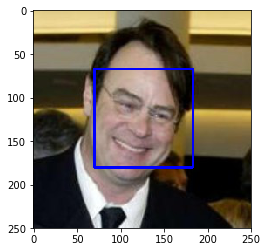

In [37]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [26]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]
#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def detector_accuracy(test_df):
    absolute_accu = 0
    for i in test_df:
        absolute_accu += face_detector(i)
    return absolute_accu/len(test_df)*100

print("Accuracy of Face detection on Humans is", \
      detector_accuracy(human_files_short), "%")
print("Accuracy of Face detection on Dogs is", \
      detector_accuracy(dog_files_short), "%")

Accuracy of Face detection on Humans is 98.0 %
Accuracy of Face detection on Dogs is 17.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

dlib.get_frontal_face_detector() seems to be another promising face detection algorithm although I didn't try it throughly.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [30]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:28<00:00, 19146646.05it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [31]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = cv2.imread(img_path)
    transform_data = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((224,224)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                                    ])
    img = transform_data(img)
    img = img.unsqueeze(0)
    if use_cuda:
        img=img.cuda()
    res = VGG16(img)
    prediction_res = torch.max(res,1)[1]
    return prediction_res # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [32]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    category = VGG16_predict(img_path)
    if category >= 151 and category <= 268:
        return True
    return False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dogs_in_human = 0
dogs_in_dogs = 0
for i in tqdm(human_files_short):
    if dog_detector(i):
        dogs_in_human += 1
for i in tqdm(dog_files_short):
    if dog_detector(i):
        dogs_in_dogs += 1  
print('Human images having dogs', dogs_in_human, ', which corresponds to',\
      dogs_in_human/len(human_files_short)*100, '% of all the images')
print('Dog images in dog dataset', dogs_in_dogs, ', which corresponds to',\
      dogs_in_dogs/len(dog_files_short)*100, '% of all the images')


100%|██████████| 100/100 [00:04<00:00, 22.17it/s]

Human images having dogs 0 , which corresponds to 0.0 % of all the images
Dog images in dog dataset 96 , which corresponds to 96.0 % of all the images


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import torch
import torchvision.models as models
import os
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision
from PIL import ImageFile

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

ImageFile.LOAD_TRUNCATED_IMAGES = True

data_transforms_train = transforms.Compose([
                transforms.RandomApply([
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(20)
                ]),
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                                    ])
data_transforms_validation = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                                    ])
batch_size = 20
shuffle = True
threads = 0


train_set = datasets.ImageFolder("/data/dog_images/train", data_transforms_train)
test_set = datasets.ImageFolder("/data/dog_images/valid", data_transforms_validation)
valid_set = datasets.ImageFolder("/data/dog_images/test", data_transforms_validation)

loaders_scratch = dict()
loaders_scratch['train'] = torch.utils.data.DataLoader(train_set, batch_size=batch_size, \
                                                   shuffle = shuffle, num_workers=threads)
loaders_scratch['test'] = torch.utils.data.DataLoader(test_set, batch_size=batch_size, \
                                                   shuffle = shuffle, num_workers=threads)
loaders_scratch['valid'] = torch.utils.data.DataLoader(train_set, batch_size=batch_size, \
                                                   shuffle = shuffle, num_workers=threads)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
+ I have decided to resize the images to 256 and chop them into 224 in the center. By doing this, the model can be trained faster and learn better because the images are more comparable across each other.
+ I also augemented the dataset, e.g. having horizontal flip and rotate. I was expecting a better performance in the training process with these augmentations.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F


# define the CNN architecture
use_cuda = torch.cuda.is_available()

class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.layer1 = nn.Conv2d(3, 64, 3, padding=1)
        self.layer2 = nn.Conv2d(64, 128, 3,  padding=1)
        self.layer3 = nn.Conv2d(128, 216, 3,  padding=1)
        self.layer4 = nn.Conv2d(216,512, 3,  padding=1)
        self.layer5 = nn.Conv2d(512,512, 3, padding=1)
        self.drop_out = nn.Dropout(p=0.3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(512*7*7, 512)
        self.fc2 = nn.Linear(512,512)
        self.fc3 = nn.Linear(512,133)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.layer1(x))
        x = self.pool(x)
        x = F.relu(self.layer2(x))
        x = self.pool(x)
        x = F.relu(self.layer3(x))
        x = self.pool(x)
        x = F.relu(self.layer4(x))
        x = self.pool(x)
        x = F.relu(self.layer5(x))
        x = self.pool(x)
        #print(x.shape)
        x = x.view(-1, 512*7*7)
        x = F.relu(self.fc1(x))
        x = self.drop_out(x)
        x = self.fc2(x)
        x = self.drop_out(x)
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ My CNN is going to have 5 layers, I suppose it is going to be a number I can get a relatively reasonable result, but still don't need to run too large a model -- providing a reasonable calculation time. It includes the construction of each layer to downsize the input of the images and the pooling steps. I took a drop_out of 0.3 to avoid overfitting. The 1st constructed fully-connected layer is placed, and the 3rd one was giving the output of 133 breeds of the dogs. The code referenced the VGG16 model paper. 

But because I have set the learning rate to a fixed value, it might rise the risk that the model cannot further improve after running for certain epoch numbers (which is exactly the case I have observed in the training phase). Anyway, since we only expect an accuracy higher than 10%, it is still acceptable for the demo. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(),lr=0.0005) #0.0001 took too long

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [14]:
from PIL import ImageFile
import numpy as np
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        
        ##### train the model #####
 
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            log_ps = model(data)
            loss = criterion(log_ps, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
  
        ##### validate the model #####
    
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
                log_ps = model(data)
                loss = criterion(log_ps, target)
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
                
            
        # print the training/validation results
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'saved_models/model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('saved_models/model_scratch.pt'))

Epoch: 1 	Training Loss: 4.855614 	Validation Loss: 4.685374
Validation loss decreased (inf --> 4.685374).  Saving model ...
Epoch: 2 	Training Loss: 4.597966 	Validation Loss: 4.457808
Validation loss decreased (4.685374 --> 4.457808).  Saving model ...
Epoch: 3 	Training Loss: 4.338721 	Validation Loss: 4.179320
Validation loss decreased (4.457808 --> 4.179320).  Saving model ...
Epoch: 4 	Training Loss: 4.109936 	Validation Loss: 3.964600
Validation loss decreased (4.179320 --> 3.964600).  Saving model ...
Epoch: 5 	Training Loss: 3.930615 	Validation Loss: 3.641893
Validation loss decreased (3.964600 --> 3.641893).  Saving model ...
Epoch: 6 	Training Loss: 3.763382 	Validation Loss: 3.519986
Validation loss decreased (3.641893 --> 3.519986).  Saving model ...
Epoch: 7 	Training Loss: 3.570038 	Validation Loss: 3.189051
Validation loss decreased (3.519986 --> 3.189051).  Saving model ...
Epoch: 8 	Training Loss: 3.359668 	Validation Loss: 2.919466
Validation loss decreased (3.18905

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.954345


Test Accuracy: 20% (172/835)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [16]:
## TODO: Specify data loaders
# use the same data loaders from the previous step
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [5]:
import torchvision.models as models
import torch.nn as nn
import torch

## TODO: Specify model architecture 

# a resnet50 model

model_transfer = models.resnet50(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.fc = nn.Linear(2048,133, bias=True)
fc_parameters = model_transfer.fc.parameters()

for param in fc_parameters:
    param.requires_grad = True
    
#print(model_transfer)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ ResNet is a subpackage for Image Recognition. ResNet50 consists of 5 stages each with a convolution and Identity block. The model can be suitable for a relatively simple task like image classification with only a few classes (133 in our case). In this step I used the pretrained model and improve its accuracy 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [9]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [13]:
from PIL import ImageFile
import numpy as np
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torch.optim as optim
from torchvision import datasets
import torchvision.transforms as transforms

data_transforms_train = transforms.Compose([
                transforms.RandomApply([
                transforms.RandomHorizontalFlip(),
                transforms.RandomRotation(20)
                ]),
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                                    ])
data_transforms_validation = transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                                    ])

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        
        ##### train the model #####
 
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            log_ps = model(data)
            loss = criterion(log_ps, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
  
        ##### validate the model #####
    
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
                log_ps = model(data)
                loss = criterion(log_ps, target)
                valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
                
            
        # print the training/validation results
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model

shuffle=True
threads=0

train_set = datasets.ImageFolder("/data/dog_images/train", data_transforms_train)
test_set = datasets.ImageFolder("/data/dog_images/valid", data_transforms_validation)
valid_set = datasets.ImageFolder("/data/dog_images/test", data_transforms_validation)
# I changed a few parameters, so a new loader was built
loaders_transfer = dict()
loaders_transfer['train'] = torch.utils.data.DataLoader(train_set, batch_size=60, \
                                                   shuffle = shuffle, num_workers=threads)
loaders_transfer['test'] = torch.utils.data.DataLoader(test_set, batch_size=60, \
                                                   shuffle = shuffle, num_workers=threads)
loaders_transfer['valid'] = torch.utils.data.DataLoader(train_set, batch_size=20, \
                                                   shuffle = shuffle, num_workers=threads)


# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, 
                      criterion_transfer, use_cuda, 'saved_models/model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('saved_models/model_transfer.pt'))

Epoch: 1 	Training Loss: 4.881160 	Validation Loss: 4.802096
Validation loss decreased (inf --> 4.802096).  Saving model ...
Epoch: 2 	Training Loss: 4.750522 	Validation Loss: 4.676789
Validation loss decreased (4.802096 --> 4.676789).  Saving model ...
Epoch: 3 	Training Loss: 4.636271 	Validation Loss: 4.563455
Validation loss decreased (4.676789 --> 4.563455).  Saving model ...
Epoch: 4 	Training Loss: 4.526593 	Validation Loss: 4.457006
Validation loss decreased (4.563455 --> 4.457006).  Saving model ...
Epoch: 5 	Training Loss: 4.426670 	Validation Loss: 4.348744
Validation loss decreased (4.457006 --> 4.348744).  Saving model ...
Epoch: 6 	Training Loss: 4.323583 	Validation Loss: 4.244739
Validation loss decreased (4.348744 --> 4.244739).  Saving model ...
Epoch: 7 	Training Loss: 4.227097 	Validation Loss: 4.144115
Validation loss decreased (4.244739 --> 4.144115).  Saving model ...
Epoch: 8 	Training Loss: 4.129907 	Validation Loss: 4.049290
Validation loss decreased (4.14411

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [15]:
import torch.nn.functional as F
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        output = F.softmax(output, dim=1)
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 3.058320


Test Accuracy: 61% (510/835)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [25]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image
import torchvision.transforms as transforms
import os
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path).convert('RGB')
    preprocess=transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(224),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                                    ])
    # add the dimension
    img_processed = preprocess(img).unsqueeze(0)
    # Move tensor to GPU if available
    if use_cuda:
        img_processed = img_processed.cuda()
    
    # evaluation
    model_transfer.eval()
    
    with torch.no_grad():
        output = model_transfer(img_processed)
        prediction = torch.argmax(output).item()  
    
    model_transfer.train()
    
    dog_breed = class_names[prediction]
    
    return dog_breed

path_list = []

for fname in os.listdir('./images'):
    path = os.path.join('./images', fname)
    #print(path)
    if os.path.isdir(path):
        # skip directories
        continue
    else:
        path_list.append(path)
        
#print(path_list)
        
# run this function on 5 samples to check whether it makes sense
for img_file in path_list[0:9]:
    predition = predict_breed_transfer(img_file)
    print("image_file_name: {0}, \t predition breed: {1}".format(img_file, predition))

image_file_name: ./images/Welsh_springer_spaniel_08203.jpg, 	 predition breed: Welsh springer spaniel
image_file_name: ./images/sample_human_output.png, 	 predition breed: Dalmatian
image_file_name: ./images/Labrador_retriever_06457.jpg, 	 predition breed: Bullmastiff
image_file_name: ./images/Curly-coated_retriever_03896.jpg, 	 predition breed: Curly-coated retriever
image_file_name: ./images/sample_cnn.png, 	 predition breed: Cavalier king charles spaniel
image_file_name: ./images/Brittany_02625.jpg, 	 predition breed: Cavalier king charles spaniel
image_file_name: ./images/Labrador_retriever_06449.jpg, 	 predition breed: Flat-coated retriever
image_file_name: ./images/American_water_spaniel_00648.jpg, 	 predition breed: Curly-coated retriever
image_file_name: ./images/sample_dog_output.png, 	 predition breed: Italian greyhound


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

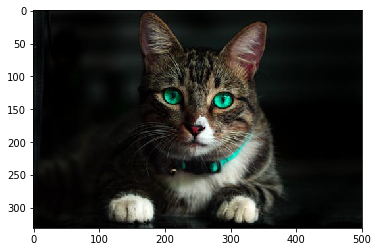

Neither dogs or human detected!
./images/cat_samples.jpeg


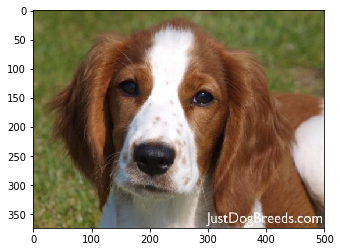

Dogs detected in the image! It looks like we have a Welsh springer spaniel here
./images/Welsh_springer_spaniel_08203.jpg


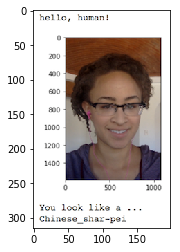

It seems that we have a human in the image!
./images/sample_human_output.png


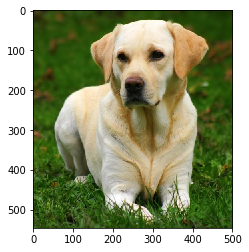

Dogs detected in the image! It looks like we have a Bullmastiff here
./images/Labrador_retriever_06457.jpg


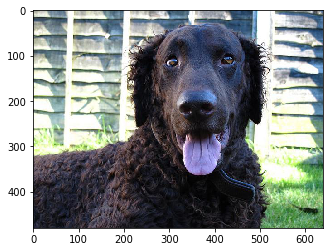

Dogs detected in the image! It looks like we have a Curly-coated retriever here
./images/Curly-coated_retriever_03896.jpg


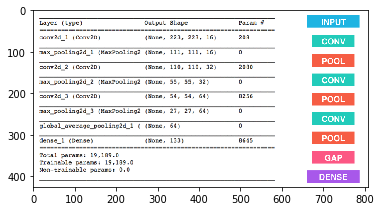

Neither dogs or human detected!
./images/sample_cnn.png


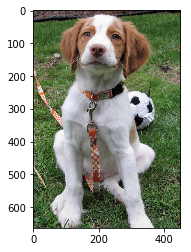

Dogs detected in the image! It looks like we have a Cavalier king charles spaniel here
./images/Brittany_02625.jpg


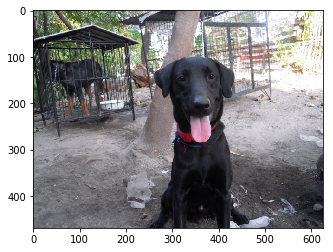

Dogs detected in the image! It looks like we have a Flat-coated retriever here
./images/Labrador_retriever_06449.jpg


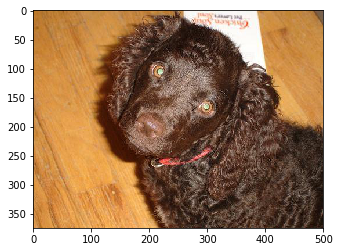

Dogs detected in the image! It looks like we have a Curly-coated retriever here
./images/American_water_spaniel_00648.jpg


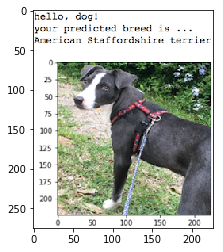

Dogs detected in the image! It looks like we have a Italian greyhound here
./images/sample_dog_output.png


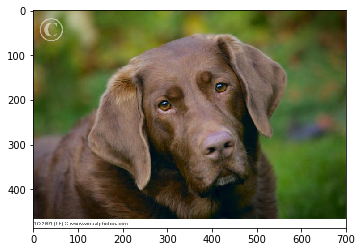

Dogs detected in the image! It looks like we have a Flat-coated retriever here
./images/Labrador_retriever_06455.jpg


In [42]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline   

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    # open the file
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if dog_detector(img_path):
        prediction = predict_breed_transfer(img_path)
        print("Dogs detected in the image! It looks like we have a {0} here".format(prediction))  
    elif face_detector(img_path) >0:
        print("It seems that we have a human in the image!")
    else:
        print("Neither dogs or human detected!")

# Test the function based on images        
for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    run_app(img_path)
    print(img_path)
    

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The algorithm was not good enough, but not so bad as I was expecting. It succeeded in detecting most of the human faces (indeed, almost all of them). In the test based on ./images folder, it was able to avoid misinterpreting the images without faces inside. Impressively, when I added a cat's image into the folder, it also told me there was no dog or human faces in the image, which was totally correct. However, when I was trying to predict the dog breed of the new images in the ./image folder, it worked much worse than predicting the dog breeds for the dog_files. It might be a hint of overfitting. 
Some potential improvements that occured to me seem to be:

1. Further increase the epoch number and play with other hyperparameters. It seemed that the model can still be improved with longer training-validation time. The loss function can still decrease with more epochs. But it might be a tradeoff between calculation time + resource / accuracy of the table.
2. The learning rate (lr). To some extent, it also belongs to the hyperparameters part. But most importantly, whether it is a good idea to keep it stable for all layers. E.g. the lower layers might just be dealing with some general features while the higher layers are more critical to the prediction of the data. Maybe we can use the lr_finder or something similar to help finding the best lr for each layer and for the model.
3. The bottleneck in the detector seem to be the prediction of the dog breeds. The transfer model itself only has an accuracy of 61%. As mentioned in point 1, it may worth optimizing the parameters within the model a little bit, but we can even try some other models and compare the performance with each other. For example, I can expect some models trained specifically on dog breed might be more efficient to be transfered to this task. Other models such as InceptionV3 may be better feature detectors.

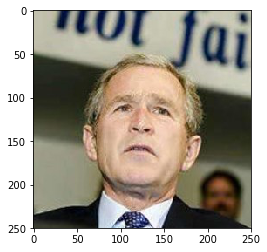

It seems that we have a human in the image!
/data/lfw/George_W_Bush/George_W_Bush_0186.jpg


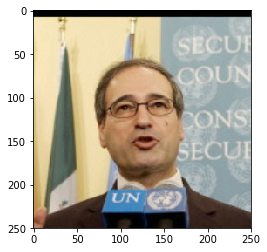

It seems that we have a human in the image!
/data/lfw/Fayssal_Mekdad/Fayssal_Mekdad_0004.jpg


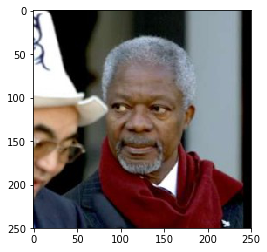

It seems that we have a human in the image!
/data/lfw/Kofi_Annan/Kofi_Annan_0005.jpg


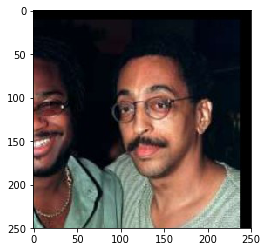

It seems that we have a human in the image!
/data/lfw/Gregory_Hines/Gregory_Hines_0001.jpg


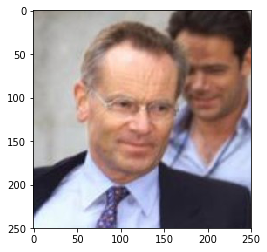

It seems that we have a human in the image!
/data/lfw/Jeffrey_Archer/Jeffrey_Archer_0002.jpg


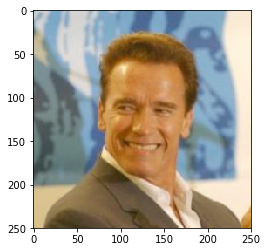

It seems that we have a human in the image!
/data/lfw/Arnold_Schwarzenegger/Arnold_Schwarzenegger_0031.jpg


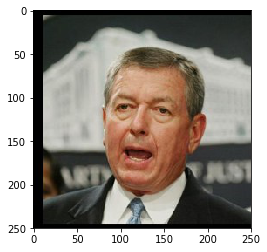

It seems that we have a human in the image!
/data/lfw/John_Ashcroft/John_Ashcroft_0005.jpg


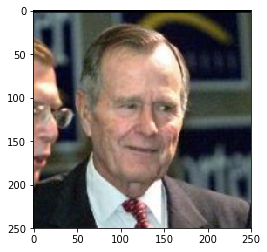

It seems that we have a human in the image!
/data/lfw/George_HW_Bush/George_HW_Bush_0005.jpg


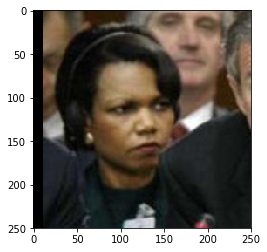

It seems that we have a human in the image!
/data/lfw/Condoleezza_Rice/Condoleezza_Rice_0004.jpg


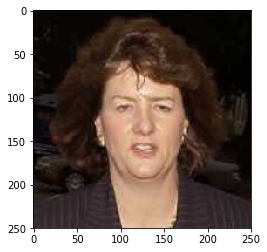

It seems that we have a human in the image!
/data/lfw/Jennifer_Keller/Jennifer_Keller_0003.jpg


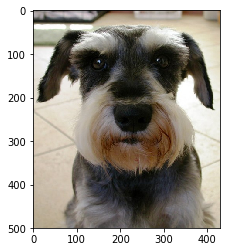

Dogs detected in the image! It looks like we have a Miniature schnauzer here
/data/dog_images/train/104.Miniature_schnauzer/Miniature_schnauzer_06894.jpg


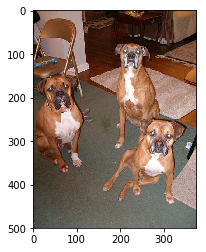

Dogs detected in the image! It looks like we have a Boxer here
/data/dog_images/train/034.Boxer/Boxer_02434.jpg


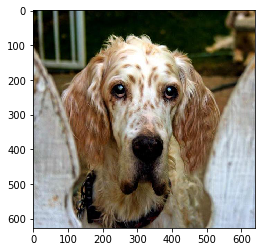

Dogs detected in the image! It looks like we have a English setter here
/data/dog_images/train/062.English_setter/English_setter_04394.jpg


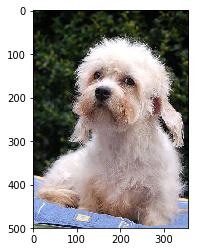

Dogs detected in the image! It looks like we have a Dandie dinmont terrier here
/data/dog_images/train/058.Dandie_dinmont_terrier/Dandie_dinmont_terrier_04132.jpg


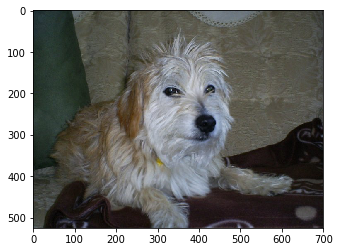

Dogs detected in the image! It looks like we have a Cairn terrier here
/data/dog_images/test/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05164.jpg


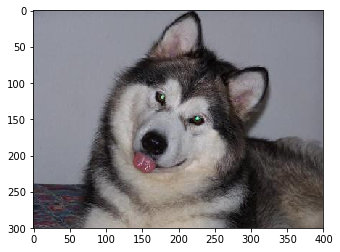

Dogs detected in the image! It looks like we have a Alaskan malamute here
/data/dog_images/train/005.Alaskan_malamute/Alaskan_malamute_00308.jpg


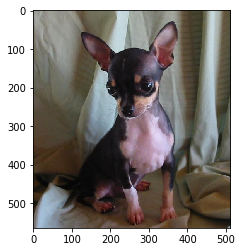

Dogs detected in the image! It looks like we have a Chihuahua here
/data/dog_images/train/048.Chihuahua/Chihuahua_03421.jpg


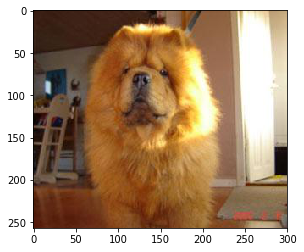

Neither dogs or human detected!
/data/dog_images/train/051.Chow_chow/Chow_chow_03631.jpg


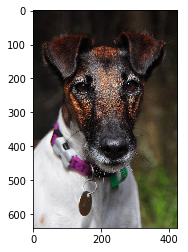

Dogs detected in the image! It looks like we have a Italian greyhound here
/data/dog_images/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08096.jpg


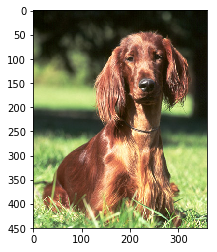

Dogs detected in the image! It looks like we have a Irish setter here
/data/dog_images/train/086.Irish_setter/Irish_setter_05847.jpg


In [48]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
## Check the image in the images folder
import random
human_random = random.sample(range(0,len(human_files)), 10)
dogs_random = random.sample(range(0,len(dog_files)),10)
    
for file in np.hstack((human_files[human_random], dog_files[dogs_random])):
    run_app(file)
    print(file)